##  Task-01 Prediction using supervised ML


## Name: Tanya Sabarwal
## Batch: May 2021 

* Linear regression with 2 variables

* Data can be found at http://bit.ly/w-data

###   Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
# reading the given dataset from url and storing it in data 
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Understanding the dataset

In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualizing the dataset

### Line Plot

<AxesSubplot:title={'center':'LINE PLOT'}>

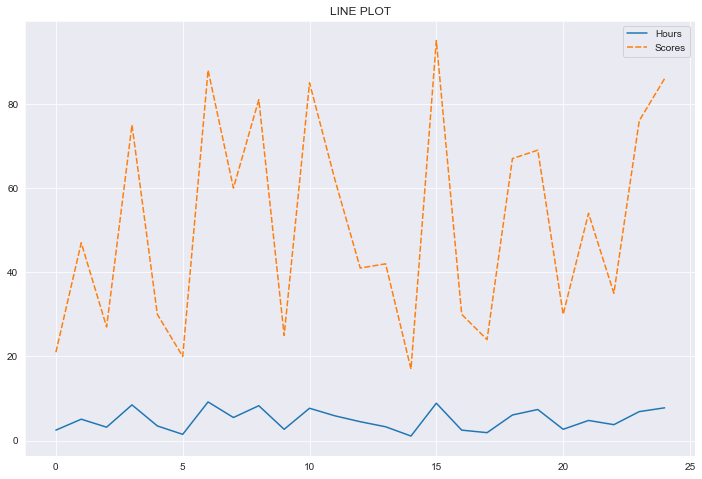

In [7]:
plt.figure(figsize=(12,8))
plt.title("LINE PLOT")
sns.lineplot(data=data)

### Regression Plot

<AxesSubplot:title={'center':'Regression PLOT'}, xlabel='Hours', ylabel='Scores'>

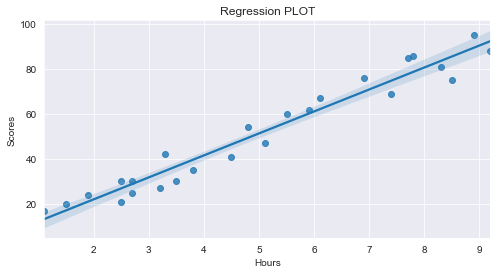

In [8]:
plt.figure(figsize=(8,4))
plt.title("Regression PLOT")
sns.regplot(data=data, x=data['Hours'], y=data['Scores'])

### Linear Regression Model

In [9]:
x = data.drop(columns= 'Scores')
y = data['Scores']
print(x.shape)
print(y.shape)

(25, 1)
(25,)


In [10]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
# Splitting the dataset into test and train

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print("shape of x_train: ",x_train.shape)
print("shape of x_test: ",x_test.shape)
print("shape of y_train: ",y_train.shape)
print("shape of y_test: ",y_test.shape)

shape of x_train:  (20, 1)
shape of x_test:  (5, 1)
shape of y_train:  (20,)
shape of y_test:  (5,)


In [12]:
import statsmodels.api as sm
model = sm.OLS(y_train, x_train).fit()

In [13]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Scores   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              1788.
Date:                Sun, 09 May 2021   Prob (F-statistic):                    2.93e-20
Time:                        18:18:44   Log-Likelihood:                         -63.239
No. Observations:                  20   AIC:                                      128.5
Df Residuals:                      19   BIC:                                      129.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Comparing the actual and predicted values

In [14]:
pred = model.predict(x_test)
data = list(zip(y_test, pred))
comptab = pd.DataFrame(data, columns=['Actual', 'Predicted'])
comptab.head()

,Actual,Predicted
0,25,27.906948
1,81,85.788024
2,62,60.981849
3,88,95.090340
4,27,33.074901


In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, pred))
print("Root mean square error: ",rmse)

Root mean square error:  4.8905929305391584


### Predicting the score for 9.25 hours 

In [16]:
print("Predicted score for 9.25 hours: ",model.predict(9.25))

Predicted score for 9.25 hours:  [95.60713541]
